### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [21]:
# Ver las columnas y tipos
print(df.dtypes)

urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


In [22]:
# Filtrar columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [23]:
# Filtrar columnas categóricas con menos de 10 categorías
cat_cols = [col for col in df.select_dtypes(include=["object", "category"]).columns
            if df[col].nunique() < 10]

# Conservar solo columnas útiles
df_filtered = df[num_cols + cat_cols].dropna()

In [24]:
df_filtered

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects
...,...,...,...
1039,10,Highly Effective,Mild Side Effects
3281,1,Ineffective,Extremely Severe Side Effects
1664,2,Marginally Effective,Moderate Side Effects
2621,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [25]:
# Transformar variables categóricas a dummies
df_dummies = pd.get_dummies(df_filtered, columns=cat_cols, drop_first=True)

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies)



#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

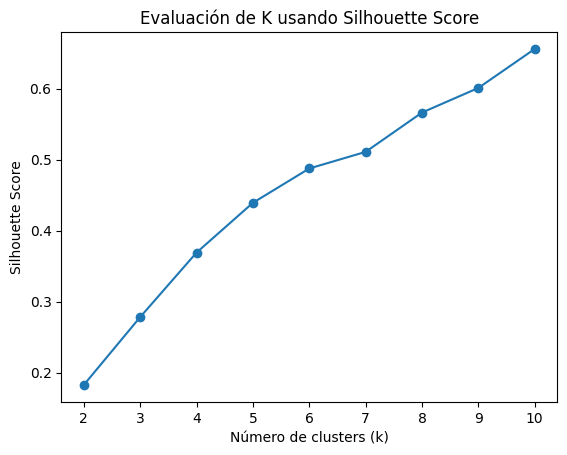

In [26]:
# Evaluar diferentes valores de K usando silhouette_score
from matplotlib import pyplot as plt

scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

# Mostrar resultados
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluación de K usando Silhouette Score')
plt.show()

#### Genera el K Means 

In [27]:
from sklearn.cluster import KMeans

# Suponiendo que el mejor K fue 3 (reemplaza por el valor real que encontraste)
best_k = 3

# Entrenar el modelo
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Añadir etiquetas al dataframe original
df_filtered["cluster"] = labels

# Ver algunos resultados
print(df_filtered["cluster"].value_counts())
df_filtered.groupby("cluster").mean()


cluster
2    1498
0    1194
1     415
Name: count, dtype: int64


TypeError: agg function failed [how->mean,dtype->object]